# Лабораторная работа №6 Дискретное косинусное преобразование

Кобыжев Александр, группа 3530901/80202

### Упражнение 6.1

In [1]:
from __future__ import print_function, division

import thinkdsp
import thinkplot
import thinkstats2

import numpy as np
import scipy.fftpack

import warnings
warnings.filterwarnings('ignore')

import dct

%matplotlib inline

Начнём с шумового сигнала и массива величин степени двойки:

In [2]:
signal = thinkdsp.UncorrelatedGaussianNoise()
noise = signal.make_wave(duration=1.0, framerate=16384)
noise.ys.shape

(16384,)

In [3]:
ns = 2 ** np.arange(6, 15)
ns

array([   64,   128,   256,   512,  1024,  2048,  4096,  8192, 16384],
      dtype=int32)

Следующая функция берёт массив результатов временного эксперимента, отображает результаты и выстраивает прямую линию.

In [4]:
def plot_bests(bests):    
    thinkplot.plot(ns, bests)
    thinkplot.config(xscale='log', yscale='log', legend=False)
    
    x = np.log(ns)
    y = np.log(bests)
    t = scipy.stats.linregress(x,y)
    slope = t[0]

    return slope

Рассмотрим результаты для `analyze1`.

64
657 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
128
1.42 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
256
3.64 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
512
9.54 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
1024
33.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
2048
152 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
4096
676 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
8192
4.19 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
16384
25.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


1.9111873370989283

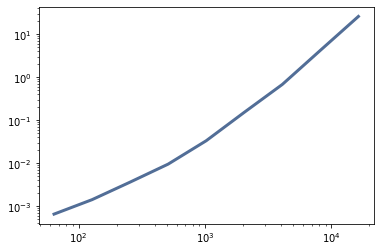

In [5]:
results = []
for N in ns:
    print(N)
    ts = (0.5 + np.arange(N)) / N
    freqs = (0.5 + np.arange(N)) / 2
    ys = noise.ys[:N]
    result = %timeit -r1 -o dct.analyze1(ys, freqs, ts)
    results.append(result)

bests = [result.best for result in results]
plot_bests(bests)

Наклон близок к 2, а не к 3. Одна из причин состоит в том, что производительность `np.linalg.solve` почти квадратична в этом диапазоне размеров массива.

Линия изогнута, что говорит нам о том, что мы не достигли размера массива, при котором среда выполнения показывает кубический рост. Я думаю, что при больших размерах массива наклон в конечном итоге сходится к 3.

Теперь рассмотрим результат для analyze2:

42.5 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)
212 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
1.04 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
3.22 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
12.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
47.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
189 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
722 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.05 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


1.9772047966153776

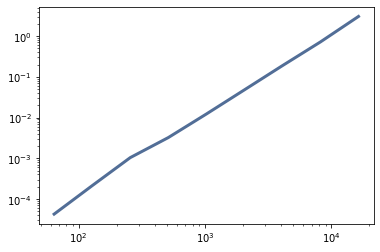

In [6]:
results = []
for N in ns:
    ts = (0.5 + np.arange(N)) / N
    freqs = (0.5 + np.arange(N)) / 2
    ys = noise.ys[:N]
    result = %timeit -r1 -o dct.analyze2(ys, freqs, ts)
    results.append(result)

bests2 = [result.best for result in results]
plot_bests(bests2)

Результаты для `analyze2`, как и ожидалось, складываются в прямую линию с предполагаемым наклоном, близким к 2.

Покажем результаты для `scipy.fftpack.dct`:

5.33 µs ± 538 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.25 µs ± 171 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.55 µs ± 408 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7.7 µs ± 128 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
9.5 µs ± 339 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
14.9 µs ± 407 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
27.3 µs ± 141 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
54.5 µs ± 470 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
107 µs ± 797 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


0.5564395911984347

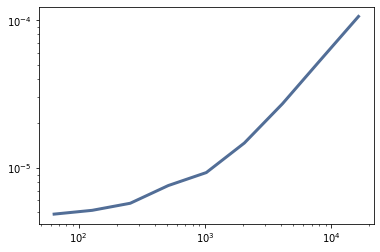

In [7]:
results = []
for N in ns:
    ys = noise.ys[:N]
    result = %timeit -o scipy.fftpack.dct(ys, type=3)
    results.append(result)

bests3 = [result.best for result in results]
plot_bests(bests3)

Эта реализация `dct` ещё быстрее. Линия изогнута, что означает, что либо мы ещё не видели асимптотическое поведение, либо асимптотическое поведение не является простым показателем 𝑛. Фактически, как мы скоро увидим, время выполнения пропорционально 𝑛log𝑛.

Теперь рассмотрим все кривые на одних осях:

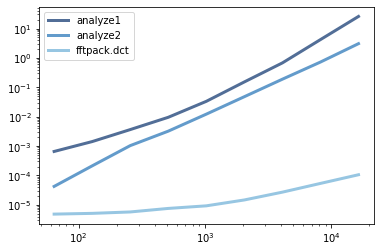

In [8]:
thinkplot.preplot(3)
thinkplot.plot(ns, bests, label='analyze1')
thinkplot.plot(ns, bests2, label='analyze2')
thinkplot.plot(ns, bests3, label='fftpack.dct')
thinkplot.config(xscale='log', yscale='log', legend=True, loc='upper left')

### Упражнение 6.2

`thinkdsp` предоставляет класс `Dct`, похожий на `Spectrum`, но использующий `DCT` вместо `FFT`.

Воспользуемся записью саксофона:

In [9]:
wave = thinkdsp.read_wave('100475__iluppai__saxophone-weep.wav')
wave.make_audio()

Теперь сделаем короткий сегмент, а затем ДКП этого сегмента:

In [10]:
segment = wave.segment(start=2.0, duration=0.5)
segment.normalize()
segment.make_audio()

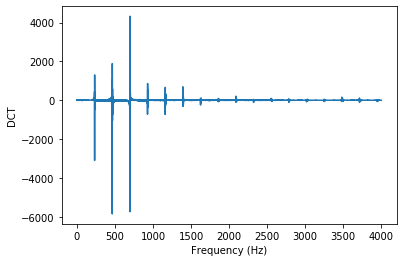

In [11]:
seg_dct = segment.make_dct()
seg_dct.plot(high=4000)
thinkplot.config(xlabel='Frequency (Hz)', ylabel='DCT')

Есть только несколько гармоник со значительной амплитудой, и многие записи близки к нулю.

Следующая функция принимает ДКП и устанавливает для элементов ниже порога значение 0.

In [12]:
def compress(dct, thresh=1):
    count = 0
    for i, amp in enumerate(dct.amps):
        if abs(amp) < thresh:
            dct.hs[i] = 0
            count += 1
            
    n = len(dct.amps)
    print(count, n, 100 * count / n, sep='\t')

Если мы применим его к сегменту, мы можем удалить более 90% элементов:

20180	22050	91.51927437641723


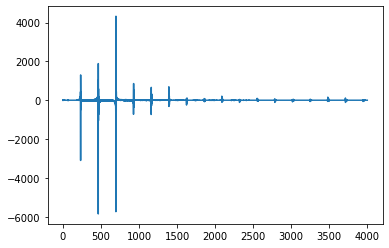

In [13]:
seg_dct = segment.make_dct()
compress(seg_dct, thresh=10)
seg_dct.plot(high=4000)

In [14]:
seg2 = seg_dct.make_wave()
seg2.make_audio()

Результат звучит точно так же, по ощущениям ничего не изменилось.

Чтобы сжать более длинный сегмент, мы можем сделать спектрограмму ДКП. Следующая функция похожа на `wave.make_spectrogram` за исключением того, что использует ДКП.

In [22]:
def make_dct_spectrogram(wave, seg_length):
    """Computes the DCT spectrogram of the wave.

    seg_length: number of samples in each segment

    returns: Spectrogram
    """
    window = np.hamming(seg_length)
    i, j = 0, seg_length
    step = seg_length // 2

    # map from time to Spectrum
    spec_map = {}

    while j < len(wave.ys):
        segment = wave.slice(i, j)
        segment.window(window)

        # the nominal time for this segment is the midpoint
        t = (segment.start + segment.end) / 2
        spec_map[t] = segment.make_dct()

        i += step
        j += step

    return thinkdsp.Spectrogram(spec_map, seg_length)

Теперь мы можем составить DCT-спектрограмму и применить сжатие к каждому сегменту:

In [23]:
spectro = make_dct_spectrogram(wave, seg_length=1024)
for t, dct in sorted(spectro.spec_map.items()):
    compress(dct, thresh=0.2)

1018	1024	99.4140625
1016	1024	99.21875
1014	1024	99.0234375
1017	1024	99.31640625
1016	1024	99.21875
1017	1024	99.31640625
1016	1024	99.21875
1020	1024	99.609375
1014	1024	99.0234375
1005	1024	98.14453125
1009	1024	98.53515625
1015	1024	99.12109375
1015	1024	99.12109375
1016	1024	99.21875
1016	1024	99.21875
1015	1024	99.12109375
1017	1024	99.31640625
1020	1024	99.609375
1013	1024	98.92578125
1017	1024	99.31640625
1013	1024	98.92578125
1017	1024	99.31640625
1018	1024	99.4140625
1015	1024	99.12109375
1013	1024	98.92578125
794	1024	77.5390625
785	1024	76.66015625
955	1024	93.26171875
995	1024	97.16796875
992	1024	96.875
976	1024	95.3125
925	1024	90.33203125
802	1024	78.3203125
836	1024	81.640625
850	1024	83.0078125
882	1024	86.1328125
883	1024	86.23046875
891	1024	87.01171875
901	1024	87.98828125
902	1024	88.0859375
900	1024	87.890625
900	1024	87.890625
894	1024	87.3046875
904	1024	88.28125
901	1024	87.98828125
915	1024	89.35546875
913	1024	89.16015625
899	1024	87.79296875
905	1024	88.37

855	1024	83.49609375
847	1024	82.71484375
837	1024	81.73828125
850	1024	83.0078125
864	1024	84.375
879	1024	85.83984375
883	1024	86.23046875
871	1024	85.05859375
888	1024	86.71875
881	1024	86.03515625
830	1024	81.0546875
870	1024	84.9609375
877	1024	85.64453125
886	1024	86.5234375
863	1024	84.27734375
871	1024	85.05859375
886	1024	86.5234375
871	1024	85.05859375
896	1024	87.5
872	1024	85.15625
870	1024	84.9609375
877	1024	85.64453125
863	1024	84.27734375
886	1024	86.5234375
898	1024	87.6953125
884	1024	86.328125
908	1024	88.671875
878	1024	85.7421875
865	1024	84.47265625
864	1024	84.375
888	1024	86.71875
870	1024	84.9609375
862	1024	84.1796875
866	1024	84.5703125
889	1024	86.81640625
879	1024	85.83984375
884	1024	86.328125
880	1024	85.9375
876	1024	85.546875
864	1024	84.375
877	1024	85.64453125
858	1024	83.7890625
894	1024	87.3046875
890	1024	86.9140625
893	1024	87.20703125
891	1024	87.01171875
896	1024	87.5
892	1024	87.109375
906	1024	88.4765625
878	1024	85.7421875
893	1024	87.2070312

В большинстве сегментов сжатие составляет 75-80%.

Чтобы услышать, как это звучит, мы можем преобразовать спектрограмму обратно в волну и воспроизвести ее.

In [25]:
wave2 = spectro.make_wave()
wave2.make_audio()

Так же прослушаем оригинал для сравнения.

In [26]:
wave.make_audio()

При сжатии слышно характерный треск во время воспроизведения аудио, так что можно смело сказать, что нам удалось сжать аудиозапись.

### Упражнение 6.3

Для начала воспользуемся пилообразной формой волны, а затем перейдём к более естественным звукам.

In [27]:
signal = thinkdsp.SawtoothSignal(freq=300, offset=0)
wave = signal.make_wave(duration=0.5, framerate=40000)
wave.make_audio()

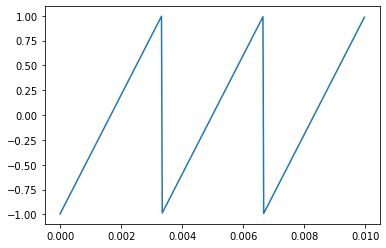

In [28]:
wave.segment(duration=0.01).plot()

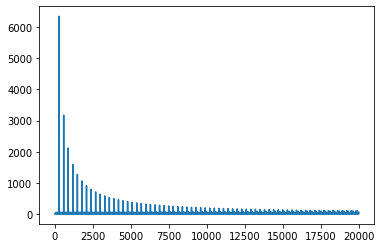

In [29]:
spectrum = wave.make_spectrum()
spectrum.plot()

Рассмотрим угловую часть спектра.

In [30]:
def plot_angle(spectrum, thresh=1):
    angles = spectrum.angles
    angles[spectrum.amps < thresh] = np.nan
    thinkplot.plot(spectrum.fs, angles, style='x')
    thinkplot.config(xlim=[0, spectrum.max_freq],
                     ylim =[-np.pi, np.pi])

На большинстве частот амплитуда мала, а угол - в значительной степени случайное число. Так что если мы построим все углы, получится небольшой беспорядок.

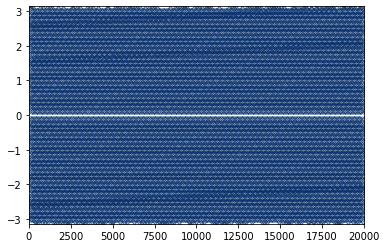

In [31]:
plot_angle(spectrum, thresh=0)
thinkplot.config(xlim=[0, spectrum.max_freq], ylim = [-np.pi, np.pi])

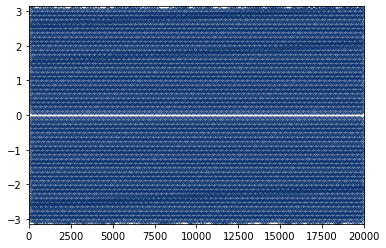

In [32]:
plot_angle(spectrum, thresh=1)
thinkplot.config(xlim=[0, spectrum.max_freq], ylim = [-np.pi, np.pi])

Когда мы выбираем только те частоты, где величина превышает пороговое значение, мы видим, что в углах есть структура. Каждая гармоника смещена от предыдущей на доли радиана.

Следующая функция отображает амплитуды, углы и форму волны для заданного спектра.

In [33]:
def plot_three(spectrum, thresh=1):
    thinkplot.preplot(cols=3)
    spectrum.plot()
    thinkplot.subplot(2)
    plot_angle(spectrum, thresh=thresh)
    thinkplot.subplot(3)
    wave = spectrum.make_wave()
    wave.segment(duration=0.01).plot()
    wave.apodize()
    display(wave.make_audio())

Теперь мы можем визуализировать неизменённый спектр:

In [34]:
plot_three(spectrum)

Теперь рассмотрим, что произойдёт, если мы установим все углы в ноль.

In [35]:
def zero_angle(spectrum):
    res = spectrum.copy()
    res.hs = res.amps
    return res

Амплитуды не изменились, все углы равны нулю, и форма волны выглядит совсем иначе. Но волна звучит примерно так же, только появился какой-то шум, да и громкость стала немного ниже.

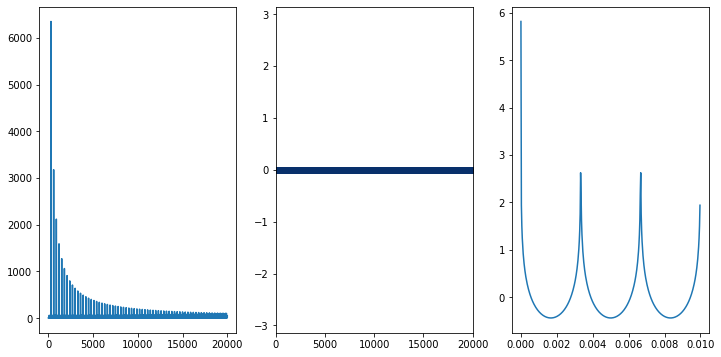

In [36]:
spectrum2 = zero_angle(spectrum)
plot_three(spectrum2)

Если мы умножим комплексные компоненты на $\exp(i\phi)$, это приведет к добавлению $\phi$ к углам:

In [37]:
def rotate_angle(spectrum, offset):
    res = spectrum.copy()
    res.hs *= np.exp(1j * offset)
    return res

Эффект можно увидеть на рисунке ниже. Опять же, форма волны другая, но звучит примерно так же.

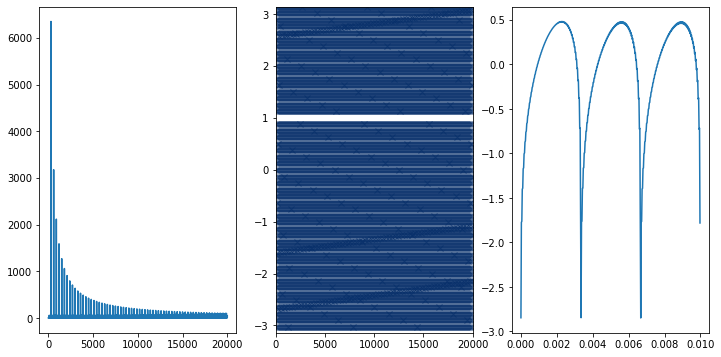

In [38]:
spectrum3 = rotate_angle(spectrum, 1)
plot_three(spectrum3)

Теперь рассмотрим случай, если мы установим углы на случайные значения.

In [39]:
PI2 = np.pi * 2

def random_angle(spectrum):
    res = spectrum.copy()
    angles = np.random.uniform(0, PI2, len(spectrum))
    res.hs *= np.exp(1j * angles)
    return res

Влияние на форму волны сильное, но воспринимаемый звук остаётся плюс минус прежним, правда он приобрёл "металлический" эффект.

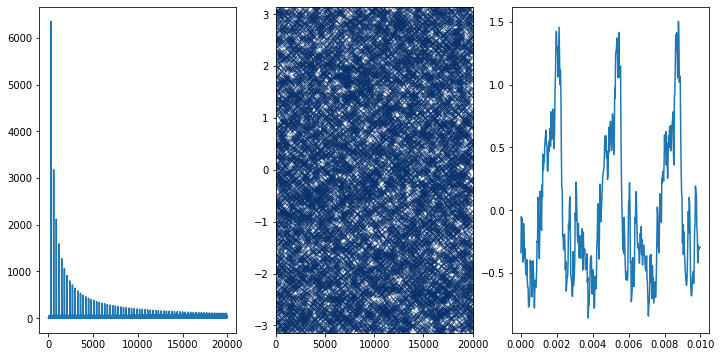

In [40]:
spectrum4 = random_angle(spectrum)
plot_three(spectrum4)

С более естественными звуками результаты несколько отличаются. Рассмотрим запись гобоя.

In [41]:
wave = thinkdsp.read_wave('120994__thirsk__120-oboe.wav')
wave.make_audio()

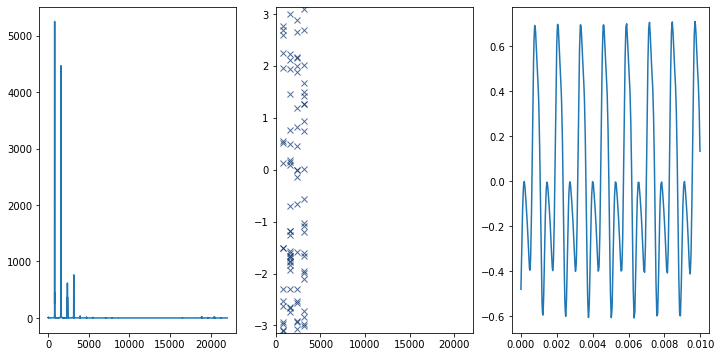

In [43]:
segment = wave.segment(start=0.2, duration=0.6)
spectrum = segment.make_spectrum()
plot_three(spectrum, thresh=50)

Здесь все углы установлены в ноль.

In [44]:
spectrum2 = zero_angle(spectrum)
plot_three(spectrum2, thresh=50)

Теперь рассмотрим случай, когда углы повёрнуты на 1 радиан.

In [45]:
spectrum3 = rotate_angle(spectrum, 1)
plot_three(spectrum3, thresh=50)

Теперь рассмотрим случайные углы.

In [46]:
spectrum4 = random_angle(spectrum)
plot_three(spectrum4, thresh=50)

Как мне кажется, установка углов в ноль снижает громкость, поворот углов не имеет вообще никакого эффекта, а случайные углы придают звуку какой-то эффект реверберации.

Попробуем то же самое с отрывком из записи саксофона.

In [59]:
wave = thinkdsp.read_wave('100475__iluppai__saxophone-weep.wav')
wave.make_audio()

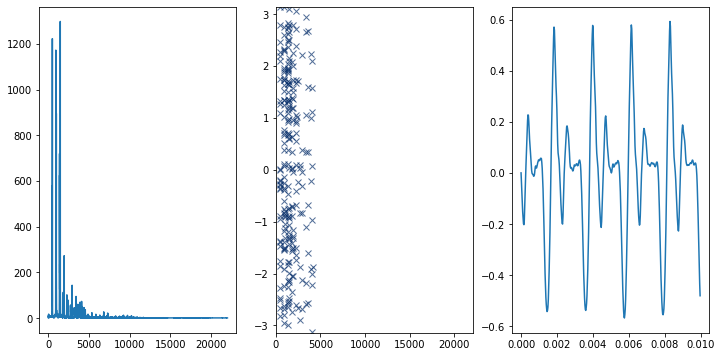

In [47]:
segment = wave.segment(start=2.5, duration=0.6)
spectrum = segment.make_spectrum()
plot_three(spectrum, thresh=50)

Установим углы равными 0.

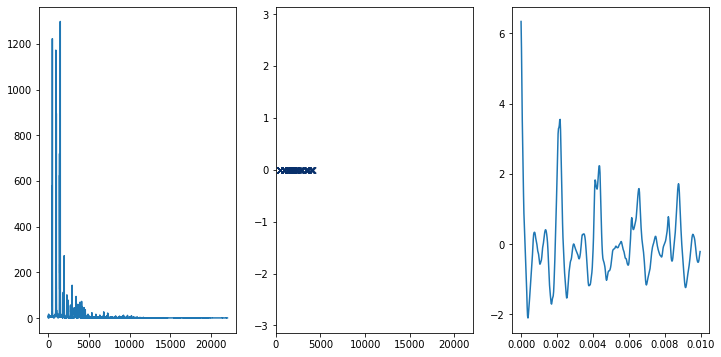

In [48]:
spectrum2 = zero_angle(spectrum)
plot_three(spectrum2, thresh=50)

Теперь повернём углы на 1 радиан.

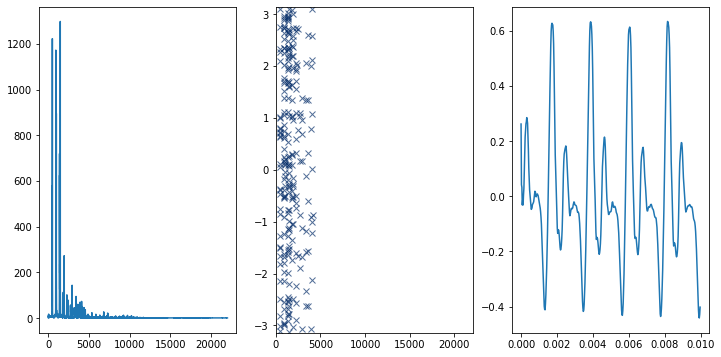

In [49]:
spectrum3 = rotate_angle(spectrum, 1)
plot_three(spectrum3, thresh=50)

В конце сделаем случайные углы.

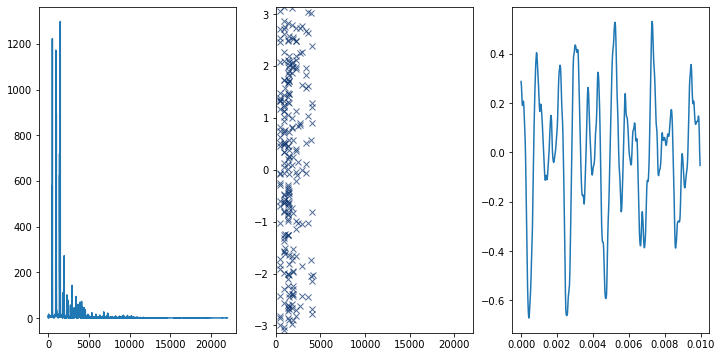

In [50]:
spectrum4 = random_angle(spectrum)
plot_three(spectrum4, thresh=50)

Прослушав все звуки можно сделать вывод, что обнуление делает со звуком какие-то странные вещи, будто бы он стал каким-то "пьяным", вращение вновь не имеет никакого эффекта, а случайные углы добавляют вновь эффект реверберации.

Также я знаю, что саксофон отличается от других звуков тем, что основной компонент не является доминирующим. Я предполагаю, что для подобных звуков ухо использует что-то вроде автокорреляции в дополнение к спектральному анализу, и возможно, что этот вторичный режим анализа более чувствителен к фазовой структуре.

Если это так, эффект должен быть более сильным, если фундаментальный вообще отсутствует. Давайте в этом убедимся.

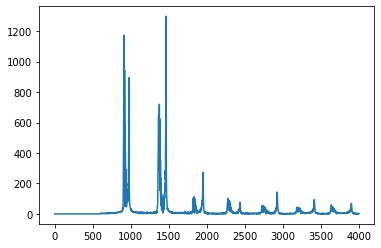

In [51]:
spectrum.high_pass(600)
spectrum.plot(high=4000)

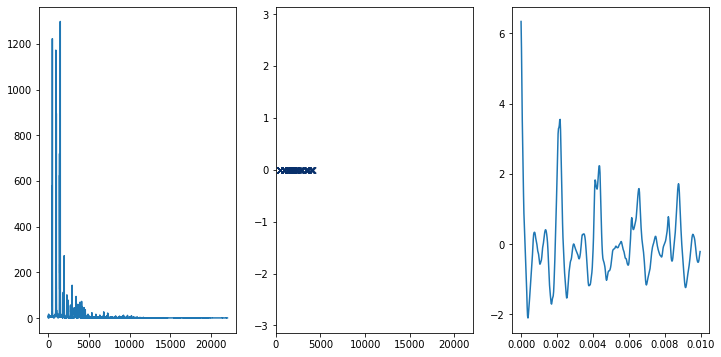

In [52]:
plot_three(spectrum2, thresh=50)

Установим углы в 0.

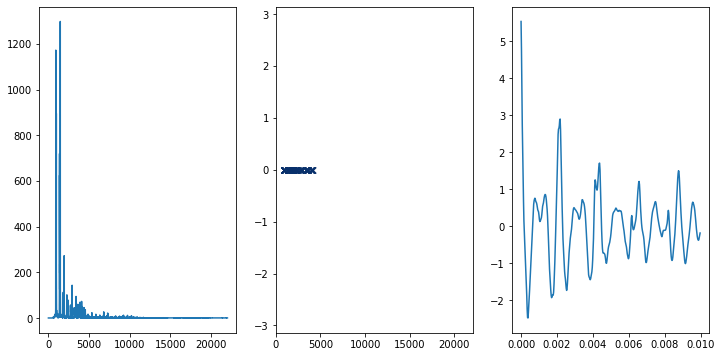

In [53]:
spectrum2 = zero_angle(spectrum)
plot_three(spectrum2, thresh=50)

Теперь повернём углы на 1 радиан.

In [54]:
spectrum3 = rotate_angle(spectrum, 1)
plot_three(spectrum3, thresh=50)

Сделаем случайные углы.

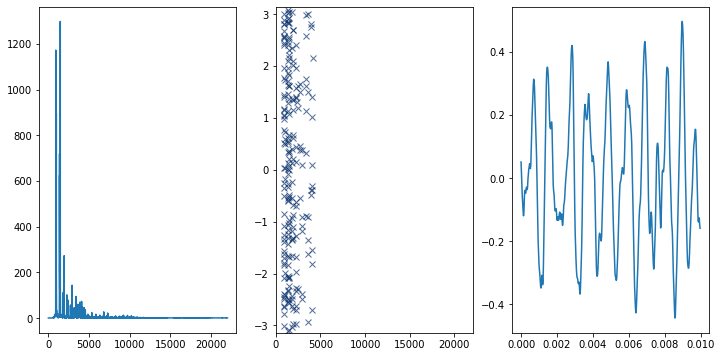

In [55]:
spectrum4 = random_angle(spectrum)
plot_three(spectrum4, thresh=50)

Для этого сегмента изменение фазовой структуры имеет слышимый эффект, особенно случайные углы.

Если ухо использует что-то вроде автокорреляции для анализа подобных звуков, мы можем ожидать увидеть изменения в функции автокорреляции при изменении фазовой структуры.

Следующие функции строят АКФ для этих сегментов:

In [56]:
def autocorr(segment):
    corrs = np.correlate(segment.ys, segment.ys, mode='same')
    N = len(corrs)
    lengths = range(N, N//2, -1)

    half = corrs[N//2:].copy()
    half /= lengths
    half /= half[0]
    return half

In [57]:
def plot_acf(spectrum):
    corrs = autocorr(spectrum.make_wave())
    thinkplot.plot(corrs[:200], linewidth=1)

In [58]:
plot_acf(spectrum)
plot_acf(spectrum2)
plot_acf(spectrum3)
plot_acf(spectrum4)
thinkplot.config(xlabel='Lag', ylabel='Correlation', ylim=[-1.05, 1.05])

Как мне кажется, изменение фазовой структуры оказывает некоторое влияние на АКФ, но не так сильно, и там нет ничего, что явно объясняет изменения в воспринимаемом звуке.

По крайней мере, для таких звуков, которые имеют простую гармоническую структуру, мы не слышим изменений в фазовой структуре, при условии, что гармоническая структура не изменилась.

Возможное исключение - звуки с низкой амплитудой на основной частоте. В этом случае мы используем что-то вроде автокорреляции для восприятия высоты звука, и это намек на то, что этот анализ может быть более чувствительным к фазовой структуре. Однако в АКФ нет ничего очевидного, объясняющего этот эффект.